# Crime analysis <br>

### Introduction
This project is made for purpose of Data mining course - Mathematics and Computer science department
Original data from Kaggle: https://www.kaggle.com/adamschroeder/crimes-new-york-city/version/1# <br>
Data : New York crime data <br>
Objective : extraction of knowledge related to crimes from dataset <br>
General purpose of this project is not classic classification of regression problems, but finding out important features of crime nature in New York. <br>
### Software
R programming language (version 3.6.0)<br>
RStudio <br>
Jupyter Notebook

### R Libraries

In [1]:
library(dplyr)
library(ggplot2)
library(DT)
library(arules)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Loading required package: Matrix

Attaching package: 'arules'

The following object is masked from 'package:dplyr':

    recode

The following objects are masked from 'package:base':

    abbreviate, write



### Data

In [2]:
crimeData = read.csv(file = "./CrimeData.csv",header = T,sep = ',')

In [3]:
crimeData[sample(x = 1:1048575,size = 15),] # a brief look at the data

day month year time  Borough   dayPart Latitude Longitude
788614  21   2    2014 20.85 BROOKLYN  17-22   40.69677 -73.91259
690229  27   7    2014 16.00 MANHATTAN 12-17   40.73307 -73.98878
483761  26  12    2014 17.00 BROOKLYN  12-17   40.64676 -73.97504
411923   1   3    2015 11.75 MANHATTAN 06-12   40.71774 -73.98279
476002   3   1    2015 10.25 QUEENS    06-12   40.77307 -73.82327
122344  28   9    2015 17.75 BRONX     17-22   40.83329 -73.87249
442678   2   2    2015  0.50 MANHATTAN 22-06   40.72652 -73.98464
330269   4   5    2015  7.75 BROOKLYN  06-12   40.69355 -73.98055
834598  16   4    2014 14.50 MANHATTAN 12-17   40.80049 -73.93515
103042  12  10    2015 16.00 MANHATTAN 12-17   40.81161 -73.93491
943575  21   1    2014 15.33 QUEENS    12-17   40.76868 -73.93023
414153  27   2    2015 11.75 QUEENS    06-12   40.70412 -73.79825
1031417 14  11    2013 11.17 MANHATTAN 06-12   40.74433 -73.99920
422540  18   2    2015 15.28 QUEENS    12-17   40.70074 -73.88596
329632   5   1    2015 12.00 QUEENS    06-12   40.75107 -73.88171
        offenseDescription               pdDescription                     
788614  OFF_AGNST_PUB_ORD_SENSBLTY_AND   AGGRAVATED_HARASSMENT_            
690229  ROBBERY                          ROBBERY_DWELLING                  
483761  CRIMINAL_MISCHIEF_AND_RELATED_OF MISCHIEF_CRIMINAL_UNCL_ND         
411923  PETIT_LARCENY                    LARCENY_PETIT_FROM_BUILDING_UN    
476002  FELONY_ASSAULT                   STRANGULATION_ST                  
122344  HARRASSMENT_                     HARASSMENT_SUBD___5               
442678  CRIMINAL_MISCHIEF_AND_RELATED_OF MISCHIEF_CRIMINAL___OF_MOTOR      
330269  PETIT_LARCENY                    LARCENY_PETIT_FROM_BUILDING_UN    
834598  OFF_AGNST_PUB_ORD_SENSBLTY_AND   AGGRAVATED_HARASSMENT_            
103042  BURGLARY                         BURGLARY_COMMERCIAL_NIGHT         
943575  ROBBERY                          ROBBERY_PERSONAL_ELECTRONIC_DEVICE
414153  PETIT_LARCENY                    LARCENY_PETIT_FROM_BUILDING_UN    
1031417 BURGLARY                         BURGLARY_TRUCK_DAY                
422540  HARRASSMENT_                     HARASSMENT_SUBD_CIVILIAN          
329632  FRAUDS                           FRAUD_UNCLASSIFIED_MISDEMEANOR    
        crimeCompleted offenseLevel occurenceLocation premiseDescription      
788614  COMPLETED      MISDEMEANOR  INSIDE            RESIDENCE_APT_HOUSE     
690229  COMPLETED      FELONY       INSIDE            RESIDENCE_APT_HOUSE     
483761  COMPLETED      FELONY       INSIDE            RESIDENCE_APT_HOUSE     
411923  COMPLETED      MISDEMEANOR  INSIDE            RESIDENCE_PUBLIC_HOUSING
476002  COMPLETED      FELONY       INSIDE            RESIDENCE_HOUSE         
122344  COMPLETED      VIOLATION    FRONT_OF          RESIDENCE_HOUSE         
442678  COMPLETED      MISDEMEANOR  FRONT_OF          STREET                  
330269  ATTEMPTED      MISDEMEANOR  INSIDE            COMMERCIAL_BUILDING     
834598  COMPLETED      MISDEMEANOR  INSIDE            RESIDENCE_PUBLIC_HOUSING
103042  COMPLETED      FELONY       MISSING_VALUE     CONSTRUCTION_SITE       
943575  COMPLETED      FELONY       FRONT_OF          STREET                  
414153  COMPLETED      MISDEMEANOR  INSIDE            MISSING_VALUE           
1031417 COMPLETED      FELONY       FRONT_OF          STREET                  
422540  COMPLETED      VIOLATION    INSIDE            RESIDENCE_APT_HOUSE     
329632  COMPLETED      MISDEMEANOR  INSIDE            RESIDENCE_APT_HOUSE

There is a noticable difference beetwen this data and original from Kaggle.<br>
Simple preprocessing is made and some variables(date event was reported,police jursdiction...) are ejected, some are changed(date to month, day and year, hours and minutes to time...) and some are added(dayPart) due to simplicity. <br>
Variable "date" is broken into 3 variables "day", "month" and "year". <br>
Variables "hours" and "minutes" are joined into 1 continuous variable time - for instance:<br> 15h 30min is now 15.5  (15 + 30/60). <br>
Variable "time" is divided into categorical variable "dayPart" with 4 classes(parts of the day).<br>
NA's are replaced with "MISSING_VALUE"

In [4]:
summary(crimeData)

      day            month             year           time      
 Min.   : 1.00   Min.   : 1.000   Min.   :1015   Min.   : 0.00  
 1st Qu.: 8.00   1st Qu.: 4.000   1st Qu.:2014   1st Qu.: 9.00  
 Median :15.00   Median : 7.000   Median :2014   Median :14.67  
 Mean   :15.52   Mean   : 6.947   Mean   :2014   Mean   :13.51  
 3rd Qu.:23.00   3rd Qu.:10.000   3rd Qu.:2015   3rd Qu.:19.00  
 Max.   :31.00   Max.   :12.000   Max.   :2015   Max.   :23.98  
 NA's   :65      NA's   :65       NA's   :65                    
          Borough        dayPart          Latitude       Longitude     
 BRONX        :227477   06-12:220746   Min.   :40.50   Min.   :-74.26  
 BROOKLYN     :315648   12-17:279515   1st Qu.:40.67   1st Qu.:-73.97  
 MANHATTAN    :244749   17-22:291612   Median :40.73   Median :-73.93  
 QUEENS       :211958   22-06:256702   Mean   :40.73   Mean   :-73.93  
 STATEN_ISLAND: 48743                  3rd Qu.:40.81   3rd Qu.:-73.88  
                                       Max.   :4

### Data visualization

The most crimes generally occur in Brooklyn while least number of crimes occur in Staten Island.

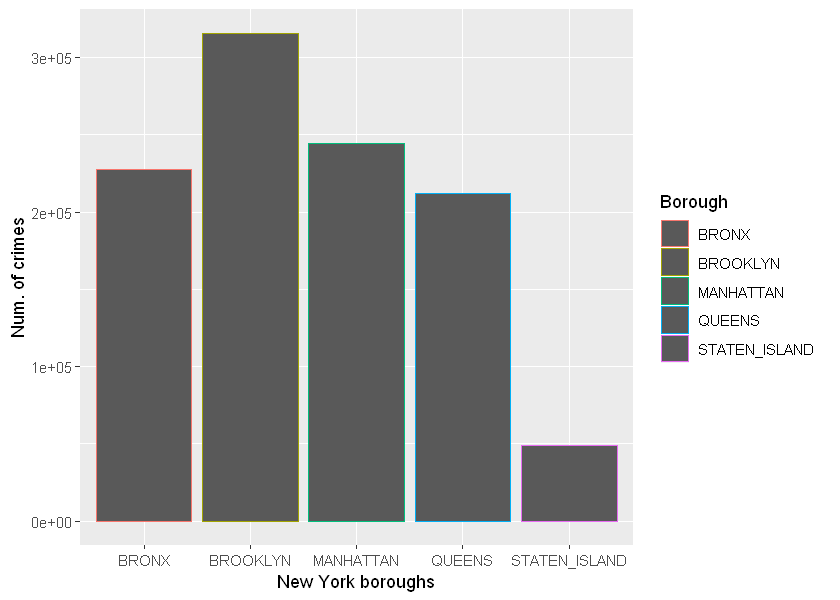

In [34]:
options(repr.plot.width=7, repr.plot.height=5)
ggplot(data = crimeData) + geom_bar(mapping = aes(x = crimeData$Borough,color = Borough))+
xlab("New York boroughs") + ylab("Num. of crimes")

Distribution of "offense level" variable<br>
Misdemeanor offense dominate over felony and violation.

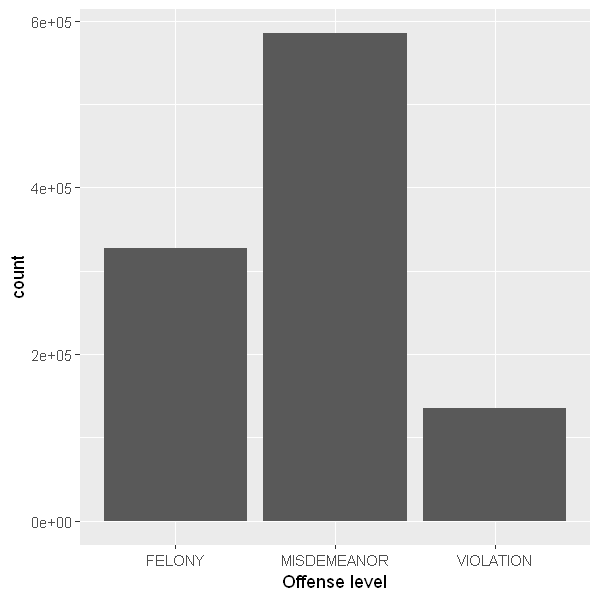

In [18]:
options(repr.plot.width=5, repr.plot.height=5)
ggplot(data = crimeData) + geom_bar(mapping = aes(x = crimeData$offenseLevel)) + xlab("Offense level")

## Simple correlations in data

Connection beetwen New York borough and offense level for newer data(2012-2015)

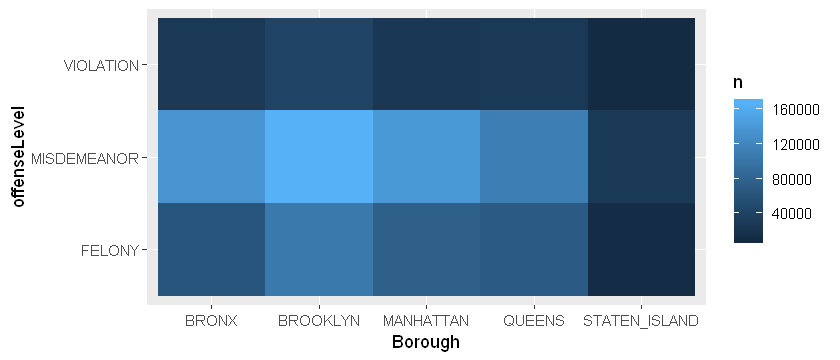

In [3]:
options(repr.plot.width=7, repr.plot.height=3)
subset(crimeData,year >= 2012) %>% count(Borough , offenseLevel) %>% ggplot(mapping = aes(x = Borough , y = offenseLevel)) + 
geom_tile(mapping = aes(fill = n))

Distribution of each offense level through the day.<br>
It is clear that second part of the day (17-21) is the time when most crimes of each level occur and the morning is the part of the day with less crime appearances.

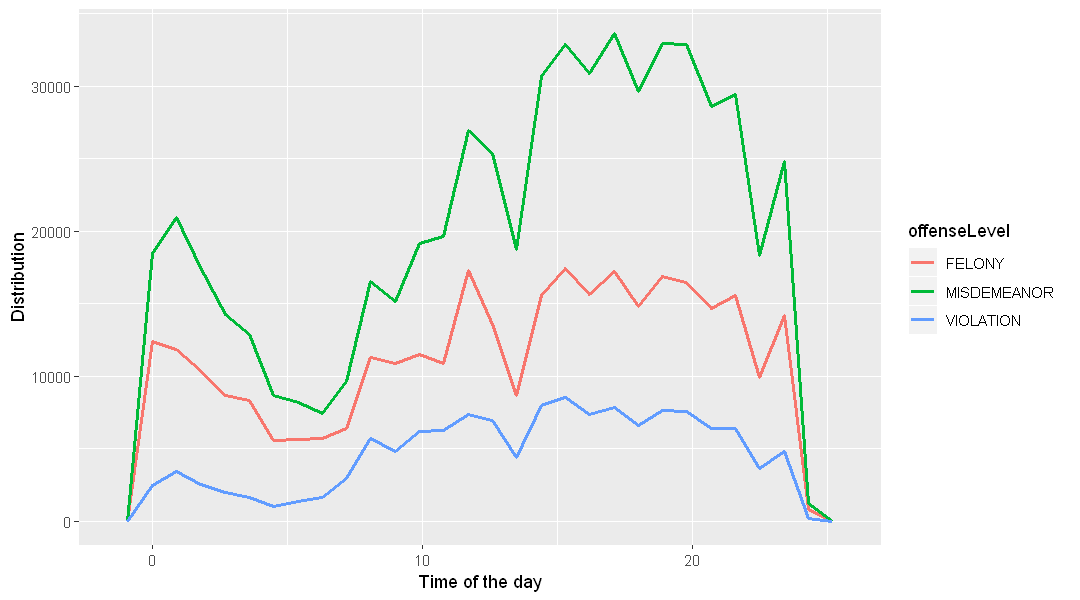

In [4]:
options(repr.plot.width=9, repr.plot.height=5)
ggplot(crimeData , mapping = aes(x = time,colour = offenseLevel))+ 
geom_freqpoly(binwidth = 0.9 , lwd = 1) + xlab("Time of the day")+ylab('Distribution')

### This trend don't change over time
The similar pattern occur if one smaller subset(44% of data) of data is taken (only crimes from last year - 2015)

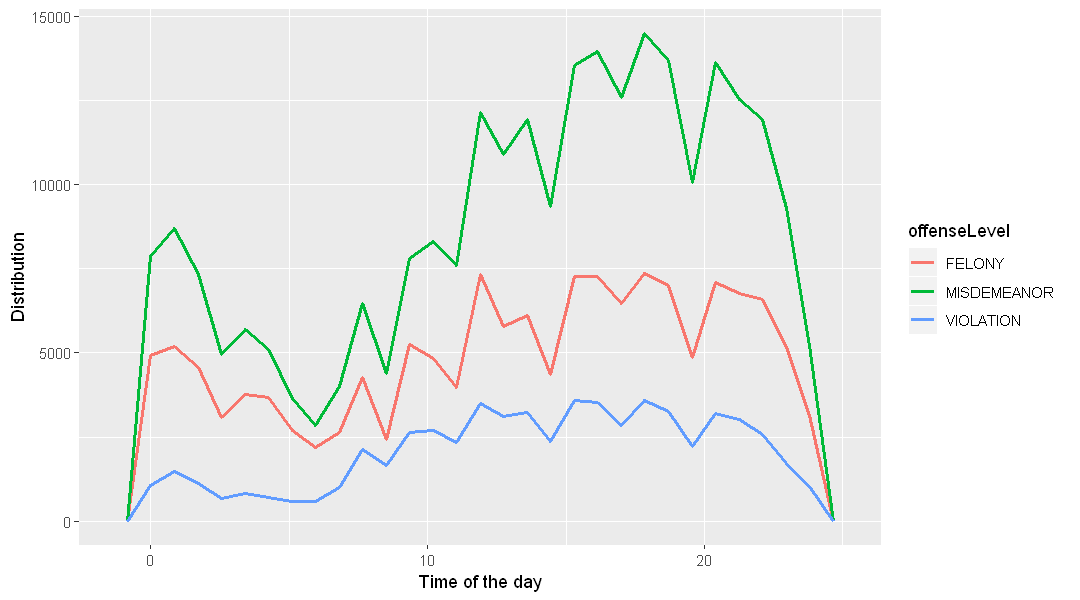

In [9]:
options(repr.plot.width=9, repr.plot.height=5)
subset(crimeData,year == 2015) %>%
ggplot(mapping = aes(x = time,colour = offenseLevel))+geom_freqpoly(binwidth = 0.85 , lwd = 1) + 
xlab("Time of the day")+ylab('Distribution')

...and 2014 year

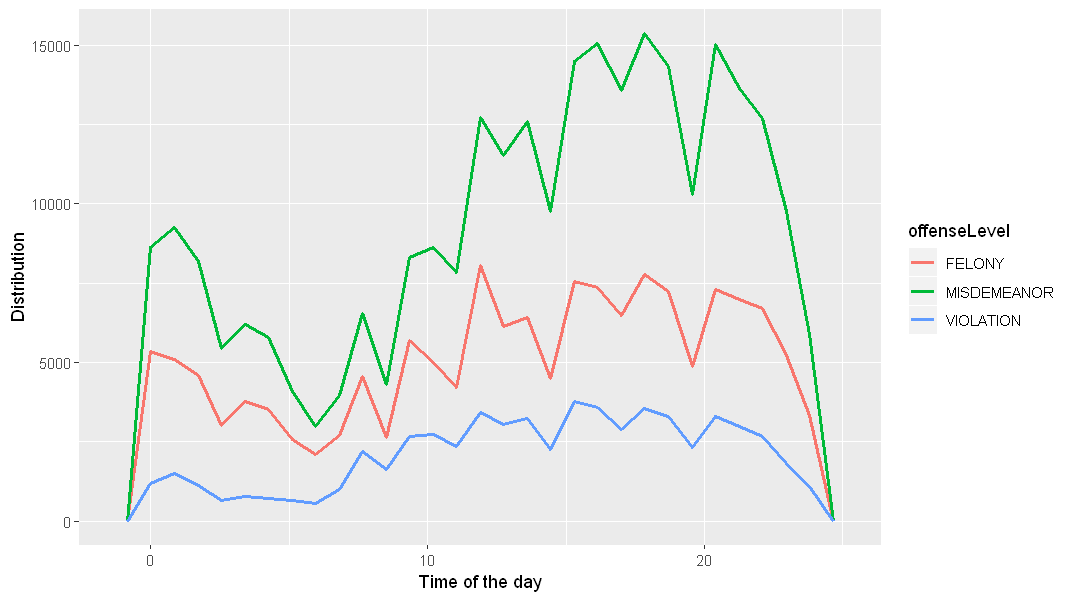

In [5]:
options(repr.plot.width=9, repr.plot.height=5)
subset(crimeData,year == 2014) %>%
ggplot(mapping = aes(x = time,colour = offenseLevel))+geom_freqpoly(binwidth = 0.85 , lwd = 1) + 
xlab("Time of the day")+ylab('Distribution')

Relation beetwen New York boroughs, offense level and time <br>
Crime offense levels mostly don't depend on borough but on time od the day.

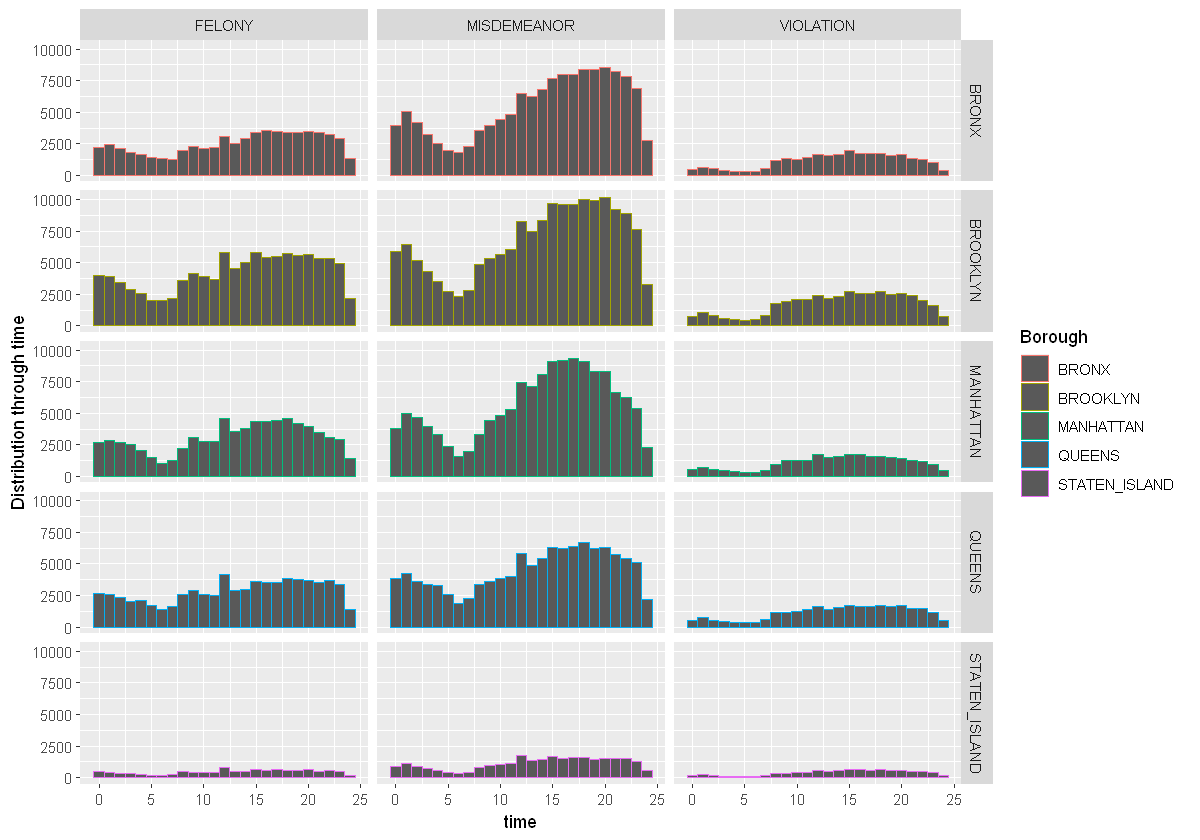

In [4]:
options(repr.plot.width=10, repr.plot.height=7)
qplot(data = subset(crimeData,year >= 2012) ,color =Borough, x = time , bins = 25 , ylab = "Distribution through time")+ 
facet_grid(Borough~offenseLevel)

Offense level vs. crime location <br>
Inside crimes are dominant independently of crime level.

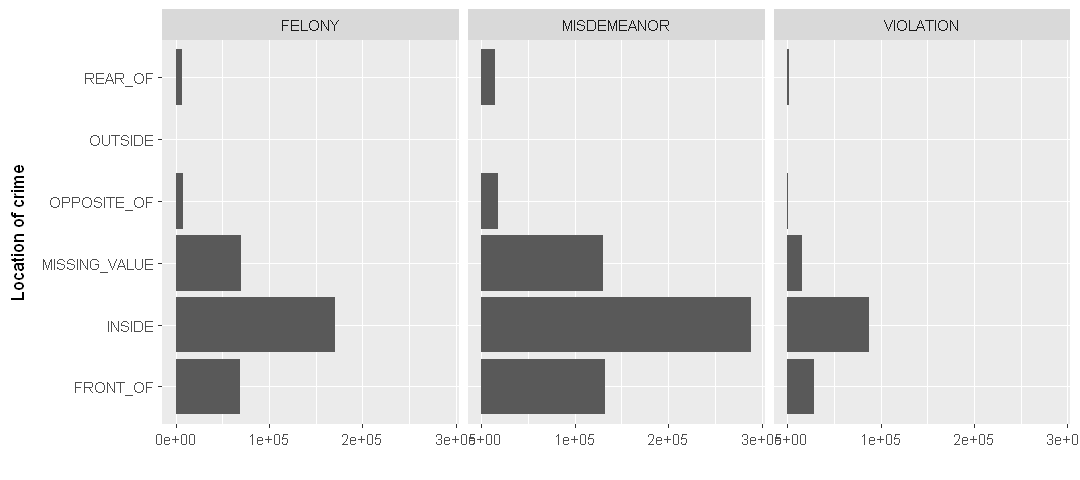

In [11]:
options(repr.plot.width=9, repr.plot.height=4)
qplot(data = subset(crimeData,year >= 2013) , x = occurenceLocation,xlab = "Location of crime")+
  facet_grid(.~offenseLevel) + coord_flip()

### How to get some new information - simple example
One of the main tasks of data mining is extraction new data and information from the old one.<br>
Here is a very simple example of getting day of the week from a given date. 

In [4]:
crimeData[15] <- crimeData[,c(3,2,1)] %>% apply(MARGIN = 1,
FUN = function(vec){paste(vec,collapse = '-')}) %>% as.Date() %>% weekdays()
names(crimeData)[15] <- 'weekDay'

#### Day of the week vs. time (year 2014 and 2015)
As it can be seen, the most dangerous time of the week is weekend night(saturday and sunday 22-06) and middle of the week through the day, while the less dangerous is the middle of the week at night and weekend mornings. <br>
For this and similar analysis the idea to track new trends that might happen and for that reason newer data is taken for analysis(in this case last 2 years).

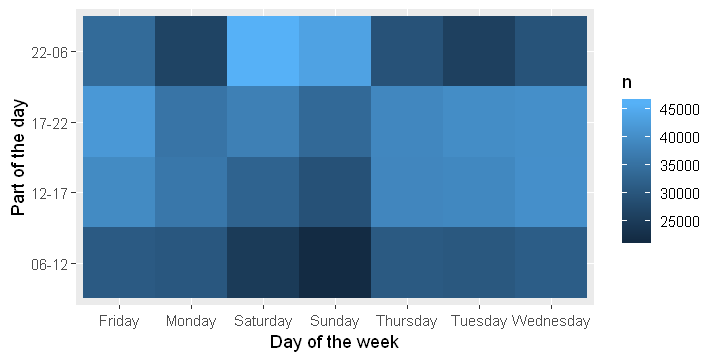

In [5]:
options(repr.plot.width=6, repr.plot.height=3)
subset(crimeData,!is.na(weekDay) & year >= 2014) %>% count(weekDay , dayPart) %>% 
ggplot(mapping = aes(x = weekDay , y = dayPart)) + geom_tile(mapping = aes(fill = n))+
xlab("Day of the week") + ylab("Part of the day")

### Some things happen more often then the others
For this kind of analysis DT library is used - simple review of particular desired events. <br>
From data-tables it is easy to observe what events are more frequent than the others.

In [7]:
options(repr.plot.width=6, repr.plot.height=4)
subset(crimeData,year >= 2014 & occurenceLocation != "MISSING_VALUE") %>% 
group_by(offenseDescription,Borough,dayPart,premiseDescription) %>% summarize(count = n()) %>% 
arrange(desc(count)) %>% head(10) %>% datatable(options = list(pageLength = 10,scrollX='400px'))

HTML widgets cannot be represented in plain text (need html)

In [8]:
subset(crimeData,year >= 2014 & occurenceLocation != "MISSING_VALUE") %>% 
group_by(occurenceLocation,Borough,dayPart,pdDescription) %>% summarize(count = n()) %>% 
arrange(desc(count)) %>% head(10) %>% datatable(options = list(pageLength = 10,scrollX='400px'))

HTML widgets cannot be represented in plain text (need html)

### Felony
Clear pattern emerges regarding 2015 felony related crimes. The most dangerous place for this specific category is Brooklyn - 12 h , beginning of the week. Exactly the same pattern come up for 2014 year.

In [11]:
subset(crimeData,year >= 2015 & offenseLevel == "FELONY") %>% group_by(Borough,time,weekDay) %>% 
summarise(count = n()) %>% arrange(desc(count)) %>% head(10) %>% 
datatable(options = list(pageLength = 10,scrollX='400px'))

HTML widgets cannot be represented in plain text (need html)

## Association rules
Association rules are rule-based data mining method for discovering certain relations between variables in data-sets. The main purpose of association rules is to discover strong rules in data-sets using measures of interestingness. <br> Let $I=\{i_1,...,i_n\}$ be the set of variables in the dataset. Observations of data-set (rows of data frame) are usually called **transactions**.
A rule is defined like implication $ A \implies B$ where $A,B \subset I$.<br> $A$ is usually called antecedent or left-hand-side (LHS) and $Y$ consequent or right-hand-side (RHS).<br>
In some implementations rule is defined like $ A \implies i_j$ where $i_j \in I$. <br>
### Significant measures
Let $X,Y$ be itemsets, $X \implies Y$ an association rule and $T$ a set of transactions of a given data-set. <br>
#### Support
Support is an indication of how frequently the itemset appears in the dataset.<br>
It is proportion of transactions(rows in data frame) that contain specific itemset, with respect to number of transactions.<br>
$supp(X) = \frac{|t \in T ; X \subset t|}{|T|}$ <br>
#### Confidence
Confidence is an indication of how often the rule has been found to be true.<br>
$conf(X \cup Y) = \frac{supp(X \cup Y)}{supp(X)}$ <br>
Confidence can be interpreted as an estimate of the conditional probability $P(Y|X)$, the probability of finding the RHS of the rule in transactions under the condition that these transactions also contain the LHS.<br>
#### The lift
The lift of a rule is defined as $lift(X \implies Y) = \frac{supp(X \cup Y)}{supp(X) * supp(Y)}$<br>
It is the ratio of the observed support to that expected if X and Y were independent events.<br>
If $X$ and $Y$ are truly independent events, we can expect that about $supp(X) * supp(Y)$ number of transactions will contain both of them. <br>
If the rule had a **lift of 1**, it would imply that the probability of occurrence of the antecedent and that of the consequent are independent of each other. When two events are independent of each other, no rule can be drawn involving those two events. <br>
If the **lift is > 1**, that lets us know the degree to which those two occurrences are dependent on one another, and makes those rules potentially useful for predicting the consequent in future data sets.<br>
If the **lift is < 1**, that lets us know the items are substitute to each other. This means that presence of one item has negative effect on presence of other item and vice versa.<br><br>
Definitons taken from : https://en.wikipedia.org/wiki/Association_rule_learning <br>
R implementation: library arules , apriori algorithm.<br><br>
### Example - wrong way of using association rules
One of the obvious ways of wrong usage of association rules is to applying it to variables tha are obviously correlated in some way. In this dataset for instance we could get rule like: <br>
offenseDescription = ASSAULT_AND_RELATED_OFFENSES $\implies$ pdDescription = ASSAULT. It is clear and natural that these 2 variables are in close relationship, so although this rule might have large lift, is not very helpfull. For this reason in examples below algorithm will take only some variables, excluding others that are obviously correlated with them.<br><br>
### Apriori algorithm
Apriori algorithm is classic algorithm for generating association rules from datasets or databases.<br>
The key idea of the algorithm is to begin by generating frequent itemsets with just one item (1-itemsets) and to recursively generate frequent itemsets with 2 items, then frequent 3-itemsets and so on till some stopping condition is satisfied. This is where computational complexity comes into the game.<br>
Apriori algorithm is based on very simple observation: **subsets of frequent itemsets are also frequent itemsets**. In other words , if some itemset is proven to be non-frequent , then it will not be considered by algorithm any more for forming new frequent itemsets. To identify the k-itemsets that are not frequent algorithm need to examine all subsets of size (k-1) of each candidate k-itemset.<br>
It generates candidate itemsets of length k from item sets of length k-1. Then it prunes the candidates which have an infrequent sub pattern.

In [4]:
rules <- apriori(data = subset(crimeData,year >= 2013)[,-c(1,2,3,6,7,8,9,10,11,14)] , 
parameter = list(support = 0.03 , confidence = 0.6,maxlen = 5,target = 'rules'))
inspect(sort(rules,by='lift'))

Warning message:
"Column(s) 1 not logical or factor. Applying default discretization (see '? discretizeDF')."

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.6    0.1    1 none FALSE            TRUE       5    0.03      1
 maxlen target   ext
      5  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 31353 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[17 item(s), 1045101 transaction(s)] done [0.88s].
sorting and recoding items ... [14 item(s)] done [0.08s].
creating transaction tree ... done [2.01s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [7 rule(s)] done [0.00s].
creating S4 object  ... done [0.25s].
    lhs                                  rhs                           support confidence     lift  count
[1] {offenseLevel=VIOLATION}          => {occurenceLocation=INSIDE} 0.08360436  0.6466426 1.236093  87375
[2] {time=[11.3,17.5),                                               

In the above example, the first couple of rules have the lift that is slightly greater than 1 which means there might be light correlation between these itemsets. On the other hand, this might be because value "INSIDE" (1st rule) for occurenceLocation is dominating over the other values of occurenceLocation. <br>
Intuitive way of interpreting this rule is something like "when crime belongs to the level VIOLATION, it is slightly more likely that it happened INSIDE than then somewhere else". However, confidence of this rule could be somewhat better so we can't accept that this is strong connection between these 2 variables although lift implies some dependence.<br><br>
### Trying to detect what is the cause of rare events
From summary table it is clear that most crimes have value COMPLETED for category crimeCompleted, much less number of crimes are registered as just ATTEMPTED. Association rules could allow us to find some specific moments that imply this rare events. <br>
Although lift is really high for these events, their count is small(2-3) and these are not indicators of any kind of correlation with ATTEMPTED value.

In [5]:
rules = apriori(data = subset(crimeData,year >= 2011)[,c(4,5,9,11,14)] , 
parameter = list(support = 0.000001 , confidence = 0.85,maxlen = 5),
appearance = list(rhs = c('crimeCompleted=ATTEMPTED')))
inspect(head(sort(rules,by='lift'),10))

Warning message:
"Column(s) 1 not logical or factor. Applying default discretization (see '? discretizeDF')."

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.85    0.1    1 none FALSE            TRUE       5   1e-06      1
 maxlen target   ext
      5  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[150 item(s), 1046908 transaction(s)] done [1.23s].
sorting and recoding items ... [146 item(s)] done [0.09s].
creating transaction tree ... done [2.92s].
checking subsets of size 1 2 3 4 5 done [0.05s].
writing ... [10 rule(s)] done [0.00s].
creating S4 object  ... done [0.32s].
     lhs                                                     rhs                             support confidence     lift count
[1]  {offenseDescription=FRAUDULENT_ACCOSTING,                                                                                
      premiseDescription=P

Greater count implies that we need to sacrifice confidence.<br>
Left-hand side of these rules with great lift value, contains some specific events like explicit part of the day when "KIDNAPPING_AND_RELATED_OFFENSES" crimes happend on the street.

In [6]:
rules = apriori(data = subset(crimeData,year >= 2013)[,c(4,5,9,11,14)] , 
parameter = list(support = 0.00001 , confidence = 0.55,maxlen = 5),
appearance = list(rhs = c('crimeCompleted=ATTEMPTED')))
inspect(head(sort(rules,by='lift'),10))

Warning message:
"Column(s) 1 not logical or factor. Applying default discretization (see '? discretizeDF')."

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.55    0.1    1 none FALSE            TRUE       5   1e-05      1
 maxlen target   ext
      5  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 10 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[150 item(s), 1045101 transaction(s)] done [1.16s].
sorting and recoding items ... [135 item(s)] done [0.09s].
creating transaction tree ... done [2.89s].
checking subsets of size 1 2 3 4 5 done [0.04s].
writing ... [3 rule(s)] done [0.00s].
creating S4 object  ... done [0.29s].
    lhs                                                     rhs                             support confidence     lift count
[1] {time=[11.3,17.5),                                                                                                       
     offenseDescription=KIDN

Association rules allow us to discover nature of serious crimes, like burglary and larceny (for 2015 year).<br>
Rules with higher lift and confidence are good candidates for better research because they imply that there might be some connection between certain variables in this subset of data.

In [8]:
rules = apriori(data = subset(crimeData,year == 2015)[,c(4,5,9,11,14,15)] , 
parameter = list(support = 0.00001 , confidence = 0.7,maxlen = 5,target='rules'),
appearance = list(rhs = c('offenseDescription=BURGLARY')))
inspect(head(sort(rules,by='count'),10))

Warning message:
"Column(s) 1, 6 not logical or factor. Applying default discretization (see '? discretizeDF')."

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.7    0.1    1 none FALSE            TRUE       5   1e-05      1
 maxlen target   ext
      5  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 4 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[154 item(s), 468576 transaction(s)] done [0.62s].
sorting and recoding items ... [143 item(s)] done [0.06s].
creating transaction tree ... done [1.19s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(data = subset(crimeData, year == 2015)[, c(4, 5, 9, 11, :
"Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!"

 done [0.16s].
writing ... [12 rule(s)] done [0.01s].
creating S4 object  ... done [0.14s].
     lhs                                       rhs                                support confidence     lift count
[1]  {time=[11.3,17.5),                                                                                            
      Borough=BRONX,                                                                                               
      premiseDescription=CONSTRUCTION_SITE,                                                                        
      weekDay=Friday}                       => {offenseDescription=BURGLARY} 2.987776e-05  0.8235294 25.72574    14
[2]  {time=[0,11.3),                                                                                               
      Borough=QUEENS,                                                                                              
      crimeCompleted=ATTEMPTED,                                                                 

In [9]:
rules = apriori(data = subset(crimeData,year == 2015)[,c(4,5,9,11,14,15)] , 
parameter = list(support = 0.00001 , confidence = 0.75,maxlen = 5,target='rules'),
appearance = list(rhs = c('offenseDescription=GRAND_LARCENY')))
inspect(head(sort(rules,by='count'),10))

Warning message:
"Column(s) 1, 6 not logical or factor. Applying default discretization (see '? discretizeDF')."

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.75    0.1    1 none FALSE            TRUE       5   1e-05      1
 maxlen target   ext
      5  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 4 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[154 item(s), 468576 transaction(s)] done [0.64s].
sorting and recoding items ... [143 item(s)] done [0.06s].
creating transaction tree ... done [1.32s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(data = subset(crimeData, year == 2015)[, c(4, 5, 9, 11, :
"Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!"

 done [0.17s].
writing ... [26 rule(s)] done [0.01s].
creating S4 object  ... done [0.15s].
     lhs                           rhs                                     support confidence      lift count
[1]  {time=[0,11.3),                                                                                         
      Borough=QUEENS,                                                                                        
      premiseDescription=ATM}   => {offenseDescription=GRAND_LARCENY} 4.695076e-05  0.8461538  9.425140    22
[2]  {time=[0,11.3),                                                                                         
      Borough=QUEENS,                                                                                        
      crimeCompleted=COMPLETED,                                                                              
      premiseDescription=ATM}   => {offenseDescription=GRAND_LARCENY} 4.268251e-05  0.8333333  9.282335    20
[3]  {time=[0,11.3),        

## Hotspots detection
Crime hotspots are parts of the city that have high crime intensity. Motivation for crime hotspot analysis is detecting crime hotspots for focusing police forces on potential residence of criminal activity.<br> Analyzing crime locations and information associated with them is one of fundamental tasks of every crime analysis.<br>
This kind of analysis is significant bacause it can easily reveal that risk of being a victim of certain type of crime is not always geographically constant. <br>
Crime pattern theory implies that generally crime is not random.
The first definition suggests that clustering crimes based on density should be right way to go.

In [16]:
library(dbscan)

### DBSCAN algorithm
For purpose of detecting crime hotspots it is appropriate to use DBSCAN(density-based spatial clustering of applications with noise) clustering algorithm.  For a given a set of points in space, it groups together points that are closely packed together(nearby neigbors).<br>
Source: https://en.wikipedia.org/wiki/DBSCAN
<br><br>
#### Simple example
Murders in Bronx in period 2014 and 2015

In [12]:
library(ggmap)
library(leaflet)
# Citation:
citation("ggmap")

Google's Terms of Service: https://cloud.google.com/maps-platform/terms/.
Please cite ggmap if you use it! See citation("ggmap") for details.



To cite ggmap in publications, please use:

  D. Kahle and H. Wickham. ggmap: Spatial Visualization with ggplot2.
  The R Journal, 5(1), 144-161. URL
  http://journal.r-project.org/archive/2013-1/kahle-wickham.pdf

A BibTeX entry for LaTeX users is

  @Article{,
    author = {David Kahle and Hadley Wickham},
    title = {ggmap: Spatial Visualization with ggplot2},
    journal = {The R Journal},
    year = {2013},
    volume = {5},
    number = {1},
    pages = {144--161},
    url = {https://journal.r-project.org/archive/2013-1/kahle-wickham.pdf},
  }


In [14]:
data = subset(crimeData, year >= 2014 & Borough == "BRONX" & 
offenseDescription == "MURDER_AND_NON_NEGL_MANSLAUGHTER" & !is.na(Longitude) & !is.na(Latitude))[,c(7,8)] 
options(repr.plot.width=9, repr.plot.height=7)
leaflet() %>% addTiles() %>% addCircleMarkers(lng=data$Longitude, lat=data$Latitude)

HTML widgets cannot be represented in plain text (need html)

In [17]:
options(repr.plot.width=8, repr.plot.height=7) # possible hotspot
clust = dbscan(x = data,eps = 0.01,minPts = 20,borderPoints = F)
leaflet() %>% addTiles() %>% 
addCircleMarkers(lng=data$Longitude[which(clust$cluster==1)], lat=data$Latitude[which(clust$cluster==1)])

HTML widgets cannot be represented in plain text (need html)

#### Robberies in Queens (2015)
Although crime hotspots can be found relatively easy with DBSCAN, they might be very natural because of greater density of population in that places(not visible from this data).<br>
Great density of population might imply greater density of some specific crime level.

In [23]:
options(repr.plot.width=8, repr.plot.height=8)
data = subset(crimeData, year >= 2015 & month>=10 & Borough == "QUEENS" & 
offenseDescription == "ROBBERY" & !is.na(Longitude) & !is.na(Latitude))[,c(7,8)]
leaflet() %>% addTiles() %>% addCircleMarkers(lng=data$Longitude, lat=data$Latitude)

HTML widgets cannot be represented in plain text (need html)

In [25]:
clust = dbscan(x = data,eps = 0.0095,minPts = 35,borderPoints = F)
leaflet() %>% addTiles() %>% 
addCircleMarkers(lng=data$Longitude[which(clust$cluster>=1)], lat=data$Latitude[which(clust$cluster>=1)])

HTML widgets cannot be represented in plain text (need html)

In example above DBSCAN algorithm found few clusters that could represent possible hotspots for certain level of crime.<br>
However, there are other methods for searching hotspots, like test for clustering. Testing for clustering is the first step in revealing whether data has hot spots of crime.<br><br>
### Nearest neighbor index (NNI)
NNI is a very simple and quick method to test evidence of clustering.<br>
This test compares the actual distribution of crime data against a data set of the same size, but with random distribution.<br>
The test has following steps:<br>
First, calculate observed average nearest neighbor distance (for every point, find it's closest neighbor and calculate their distance, then average all those distances).<br>
Do the same thing for random distribution of the same size - average random nearest neighbor distance.<br>
NNI is the ratio of the observed average nearest neighbor distance against the average random nearest neighbor distance.<br>
If the result generated from the NNI test is 1, then the crime data are randomly distributed.<br>
If the NNI is less than 1, then the crime data show some evidence of clustering.<br> An NNI that is greater than 1 reveals evidence of a uniform pattern in crime data. <br>
### Z-score test statistics
A z-score test statistic can be applied to gain confidence in the NNI result. This test of statistical significance describes how different the actual average nearest neighbor distance is from the average random nearest neighbor distance. General principle is that the more negative the z-score, the
more confidence can be placed in the NNI result.<br><br>
#### Example  -  testing hotspots
In the example above it is easy to find NNI which is about 0.68 which means this clustering is not just a coincidence.

In [26]:
library(spatialEco) # library with NNI statistics
library(sp)

In [27]:
subset(crimeData, year >= 2015 & month>=10 & Borough == "QUEENS" & 
offenseDescription == "ROBBERY" & !is.na(Longitude) & !is.na(Latitude))[,c(7,8)] %>%
SpatialPoints() %>% nni(win = 'hull')

Warning message:
"data contain duplicated points"

$NNI
[1] 0.6287652

$z.score
[1] -20.62022

$p
[1] 1.80734e-94

$expected.mean.distance
[1] 0.003302649

$observed.mean.distance
[1] 0.002076591

### Crime oportunity - vehicle crimes
Some places have greater oportunity for vehicle crimes

In [28]:
options(repr.plot.width=8, repr.plot.height=5)
data = subset(crimeData,year >= 2014 & Borough == "STATEN_ISLAND" & offenseDescription == "VEHICLE_AND_TRAFFIC_LAWS" & 
!is.na(Longitude) & !is.na(Latitude))[,c(7,8)]
leaflet() %>% addTiles() %>% addCircleMarkers(lng=data$Longitude, lat=data$Latitude)

HTML widgets cannot be represented in plain text (need html)

In [29]:
clust = dbscan(x = data,eps = 0.02,minPts = 45,borderPoints = F)
leaflet() %>% addTiles() %>% addCircleMarkers(lng=data$Longitude[which(clust$cluster>=1)], lat=data$Latitude[which(clust$cluster>=1)])
nni(SpatialPoints(data))

HTML widgets cannot be represented in plain text (need html)

Warning message:
"data contain duplicated points"

$NNI
[1] 0.648319

$z.score
[1] -11.94084

$p
[1] 7.248425e-33

$expected.mean.distance
[1] 0.003290331

$observed.mean.distance
[1] 0.002133184

### Dangerous drugs hotspots
Hotspot analysis can be very simple and suitable method for prevention of selling drugs.<br>
It might be the answer on the question "Where the most amount of drugs are being sold or consumed?".

In [32]:
options(repr.plot.width=8, repr.plot.height=8)
data = subset(crimeData, year >= 2015 & month>=10 & Borough == "BRONX" & 
offenseDescription == "DANGEROUS_DRUGS" & !is.na(Longitude) & !is.na(Latitude))[,c(7,8)]
leaflet() %>% addTiles() %>% addCircleMarkers(lng=data$Longitude, lat=data$Latitude)

HTML widgets cannot be represented in plain text (need html)

In [33]:
clust = dbscan(x = data,eps = 0.0035,minPts = 60,borderPoints = F)
leaflet() %>% addTiles() %>% addCircleMarkers(lng=data$Longitude[which(clust$cluster>=1)], lat=data$Latitude[which(clust$cluster>=1)])
nni(SpatialPoints(data))

HTML widgets cannot be represented in plain text (need html)

Warning message:
"data contain duplicated points"

$NNI
[1] 0.4859611

$z.score
[1] -44.8927

$p
[1] 0

$expected.mean.distance
[1] 0.001118357

$observed.mean.distance
[1] 0.0005434781

## Conclusion
Crime is one of inevitable parts of today's civilization, especially in greater areas and cities.<br>
In last few decades, due to  development of new tehnologies and numerous number of statistical researches, scientists and researchers developed advanced statistical concepts that are very useful for crime analysis and prevention. <br>
Through the years these analyses showed that generally crime is not random at all, there are certain causes of these events that can be understood and predicted to some measure. <br>
Even simple statisical analysis and tests can reveal correlations in data that are not visible and obvious at first sight.<br>
The question that rises up after any kind of crime analysis and prevention is, will those attempts of prevention stop some amount of crime to happen in some places, but cause the same type of crimes to occur in different places.<br>
For example, hotspot analysis reveal drug-hotspots and police actually manage to repress that kind of crimes, but after a while crimes related to drugs start to occur in some other places, forming new hotspots that did not exist before.